In [1]:
import sys
from PyQt5.QtWidgets import *
from PyQt5 import uic,QtGui
from PyQt5.QAxContainer import *
from PyQt5.QtGui import *
import distance_to_camera_and_face as dtc
import eye_blink_detection as ebd
import time as t
import image_making as im

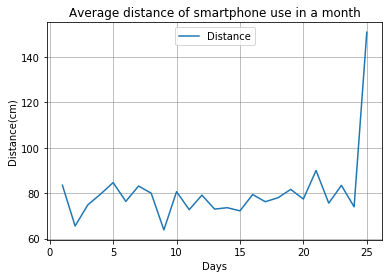

In [2]:
form_class = uic.loadUiType("MainWindow.Ui")[0]
class MainWindow(QMainWindow,form_class):
    
    def __init__(self):
        super().__init__()
        self.setFixedSize(321, 527)
        self.setUI()
        
    def setUI(self):
        self.setupUi(self)
        self.pushButton.clicked.connect(self.OnOffButtonClick)
        self.horizontalSlider.valueChanged.connect(self.ambient_light_control)
        self.pushButton_3.clicked.connect(self.open_DiagnosisWindow)
        self.pushButton_2.clicked.connect(self.open_dataAnalysisWindow)
        
    def open_dataAnalysisWindow(self):
        from DataAnalysisWindow import DataAnalysisWindow
        self.daw = DataAnalysisWindow()
        self.daw.show()
        im.set_date(self.daw.label_2.text(),self.daw.label.text())
        im.setting_database(self.daw.label_4)
        self.daw.label_4.setPixmap(QtGui.QPixmap('analysis_image.png.'))
        self.hide()
        
    def open_DiagnosisWindow(self):
        from DryEyeSyndromeWindow import DryEyeSyndromeWindow
        if self.pushButton.isChecked():
            self.pushButton.setChecked(False)
            dtc.check(-1)
        self.DiagnosisWindow = DryEyeSyndromeWindow()
        self.DiagnosisWindow.show()
        self.hide()
        
    def OnOffButtonClick(self):
        if self.pushButton.isChecked():
            dtc.check(1)
            dtc.play(self.label_6)
        else:
            dtc.check(-1)
    
    def ambient_light_control(self):
        value = self.horizontalSlider.value()
        self.label_4.setText(str(value))
        dtc.ambient_light_check(value)
        
if __name__ == "__main__":
    app = QApplication(sys.argv)
    myApp = MainWindow()
    myApp.show()
    app.exec()
        